# Lista 2

## zadanie 1

mediana, kwartyle, rozstęp z próby, rozstęp międzykwartylowy,
wariancja z próby oraz odchylenie standardowe. Wyznacz powyższe charakterystyki dla wysymululowanej próby z rozkładu normalnego z parametrami µ = 2 i σ = 2 o długości 2000
elementów

In [1]:
import math, matplotlib.pyplot as plt, seaborn, numpy as np
from  scipy.stats import norm

In [2]:
X = np.random.normal(loc = 2, scale = 2, size = 2000)

In [3]:
def mediana(X):
    n = len(X)
    if n%2==0:
        s = int(n/2)
        return (sorted(X)[s]+sorted(X)[s+1])/2
    else:
        return sorted(X)[int(n/2)]

In [4]:
def Q1(X):
    s = int(len(X)/2)
    return mediana(X[0:s+1])

In [5]:
def Q2(X):
    return mediana(X)

In [6]:
def Q3(X):
    s = int(len(X)/2)
    return mediana(X[s::])

In [7]:
def rozstepZProby(X):
    return Q3(X)-Q1(X)

In [8]:
def rozMiedzykwartylowy(X):
    Y = sorted(X)
    return Y[-1] - Y[0]

In [9]:
def wariancjaZProby(X):
    n = len(X)
    return 1/(n-1)*sum((xi - sum(X)/n)**2 for xi in X)

In [10]:
def odchylenie(X):
    return math.sqrt(wariancjaZProby(X))

In [11]:
def mean(X):
    n = len(X)
    return sum(X)/n

In [60]:
print(mediana(X),'\n', Q1(X),'\n',  Q2(X),'\n',  Q3(X),'\n',  rozstepZProby(X),'\n',  rozMiedzykwartylowy(X),'\n',  wariancjaZProby(X),'\n',  odchylenie(X))


2.0777008522566502 
 2.071726979733348 
 2.0777008522566502 
 2.0893494509896655 
 0.01762247125631733 
 14.59213541106421 
 4.007033740661724 
 2.001757662820783


## zadanie 2

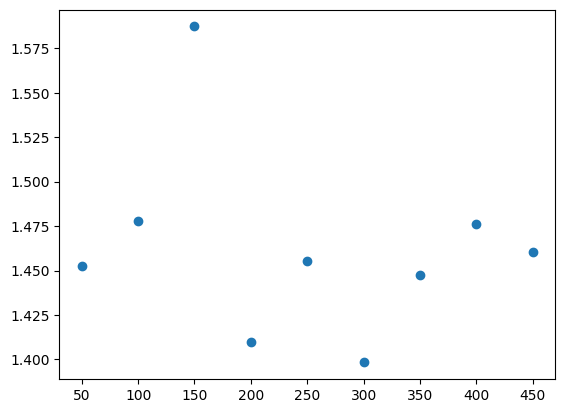

In [15]:
# mi = 2, sigma =3
N = list(range(50, 500, 50)) # dla każdego N 100 razy
mi = 2
sigma = 3
def E(sigma):
    return math.sqrt(2/math.pi)*sigma
t = E(sigma)
tab = []
for i in N:
    tab.append(0)
    X2 = np.random.normal(loc = 2, scale = 3, size = i)
    for k in range(100):
        m = [abs(xi - mean(X2)) for xi in X2]
        tabm = [abs(mj-t) for mj in m]
        tab[-1]+= mean(tabm)
    tab[-1] /= 100
plt.scatter(N, tab)
plt.show()

## zadanie 3

In [45]:
from pandas import *
dane = read_csv('CollegeDist.csv', delimiter=';')['score'].to_list()

In [46]:
def arytmetyczna(X):
    return mean(X)

In [47]:
arytmetyczna(dane)

50.88902933684601

In [48]:
def harmoniczna(X):
    return len(X)/sum(1/xi for xi in X)

In [49]:
harmoniczna(dane)

49.340266924477085

In [50]:
def geometryczna(X):
    n = len(X)
    prod = 1
    for xi in X:
        prod *= xi**(1/n)
    return prod

In [51]:
geometryczna(dane)

50.12365436417006

In [52]:
def ucinana(X,k):
    n = len(X)
    Xs = sorted(X)
    return 1/(n-2*k) * sum(xi for xi in Xs[k:n-k])

In [53]:
def winsorowska(X,k):
    n = len(X)
    Xs = sorted(X)
    return 1/n * ((k+1)*Xs[k] + sum(xi for xi in Xs[k+1:n-k]) + (k+1)*Xs[n-k-1])

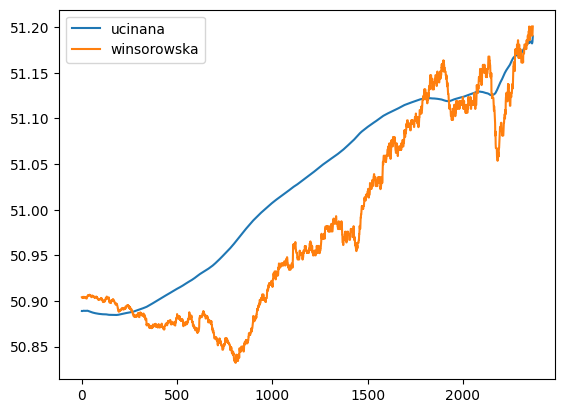

In [56]:
p = int(len(dane)/2)
xs = range(p)
ys1 = [ucinana(dane, k) for k in range(1,p+1)]
ys2 = [winsorowska(dane, k) for k in range(1,p+1)]
plt.plot(xs, ys1, label='ucinana')
plt.plot(xs, ys2, label = 'winsorowska')
plt.legend()
plt.show()

## zadanie 4

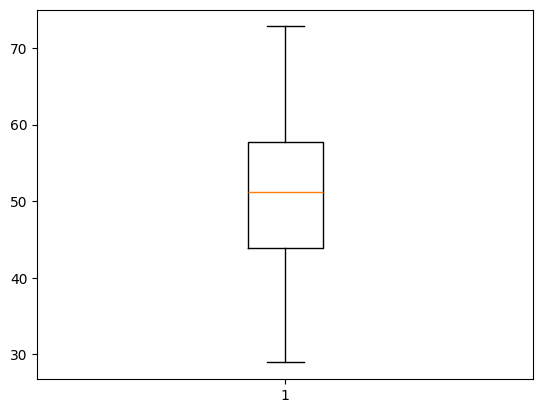

In [61]:
plt.boxplot(dane)
plt.show()

In [59]:
print('mediana: ',mediana(X),'\n', '1. kwartyl: ',Q1(X),'\n', 'drugi kwartyl', Q2(X),'\n', 'trzeci kwartyl', Q3(X),'\n', 'rozstęp: ', rozstepZProby(X),'\n', 'rozstęp międzykwartylowy:', rozMiedzykwartylowy(X),'\n', 'wariancja:', wariancjaZProby(X),'\n',  odchylenie(X))
print('minimum:', min(dane),'\nmaksimum:', max(dane))

mediana:  2.0777008522566502 
 1. kwartyl:  2.071726979733348 
 drugi kwartyl 2.0777008522566502 
 trzeci kwartyl 2.0893494509896655 
 rozstęp:  0.01762247125631733 
 rozstęp międzykwartylowy: 14.59213541106421 
 wariancja: 4.007033740661724 
 2.001757662820783
minimum: 28.950000762939453 
maksimum: 72.80999755859375
